In [1]:
#import sys
#!{sys.executable} -m pip install sklearn

In [2]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import math

import Intensity
from Embryo import *
from TestingArea import *
from Polygon import *
from Rotation import *
from Boundary import *

Test Embryo Class

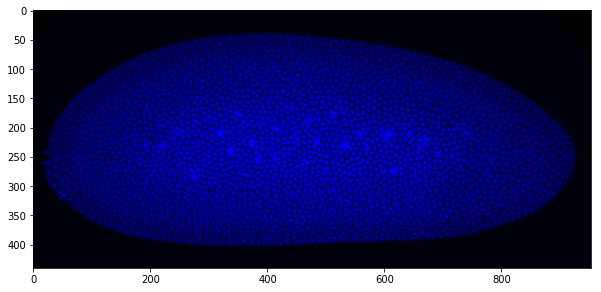

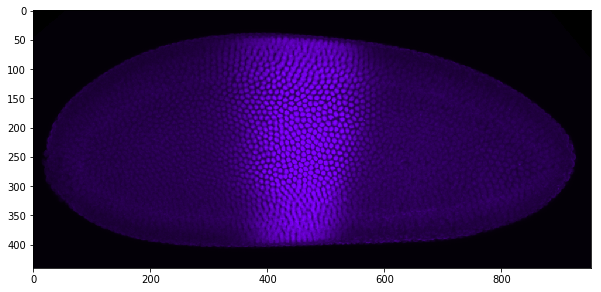

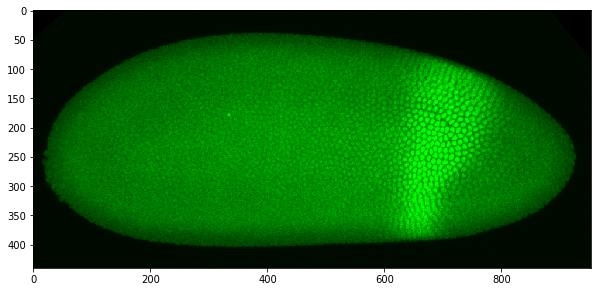

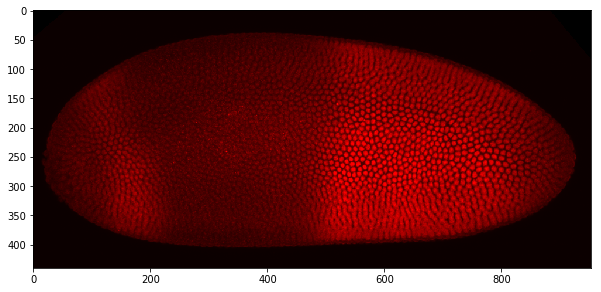

In [3]:
embryo_list =[]

gene_names = np.array( ['C1-WT','C2-WT','C3-WT','C4-WT'] )
gene_position = 9

for name in gene_names:
    filename ="%s-%i.png"%(name, gene_position)
    egg = Embryo(filename)
    egg.gene_name = name
    egg.gene_position = gene_position
    embryo_list.append( egg )

for egg in embryo_list:
    egg.view()
    egg.rgb2gray()


C1-WT
9


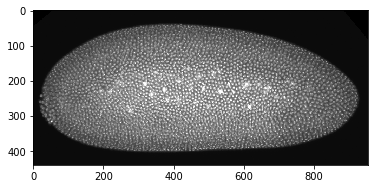

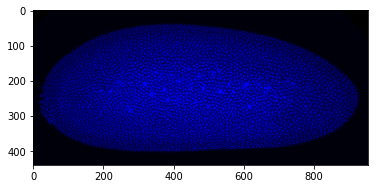

In [4]:
# test gray_image and backup_imgae
# test attribute
egg1 = embryo_list[0]

print(egg1.gene_name)
print(egg1.gene_position)

plt.imshow(egg1.gray_image, 'gray')
plt.show()

plt.imshow(egg1.bk_image)
plt.show()


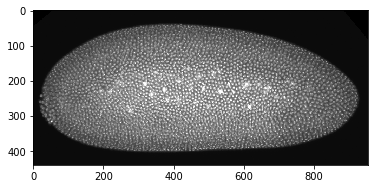

"\nTodo:  test existence of a filename: \n    \negg = Embryo('aaa')\n\n"

In [5]:
# test read from array
egg = Embryo(egg1.raw_image)

plt.imshow(egg.raw_image, 'gray')
plt.show()

"""
Todo:  test existence of a filename: 
    
egg = Embryo('aaa')

"""




Test Boundary Class



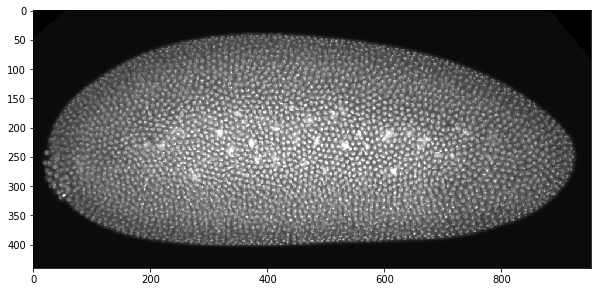

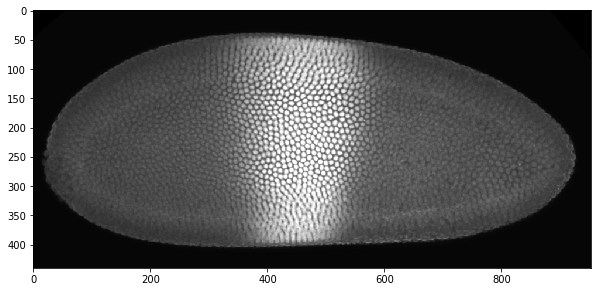

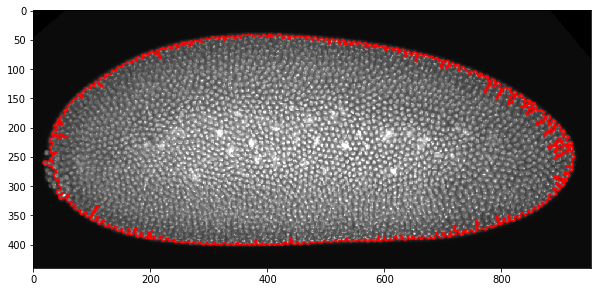

In [6]:
# initialization from an Embryo object
bd = Boundary(egg1)
bd.view()

# initialization from an array
egg2 = embryo_list[1]
bd.set_ref_image(egg2)
bd.view()

#detect boundary
bd = Boundary(egg1.raw_image)
bd.detect_boundary()
bd.view_boundary_curve()


head: [925.38917203 251.57011506]
tail: [ 22.20704882 228.2617961 ]
center: [458. 231.]
orientation -0.04398229715025747


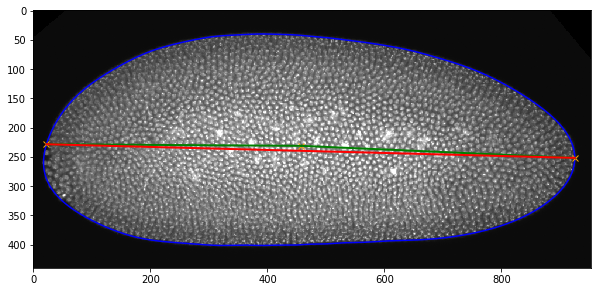

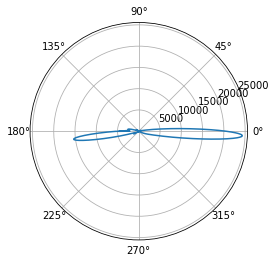

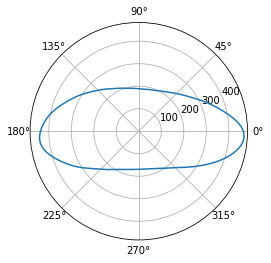

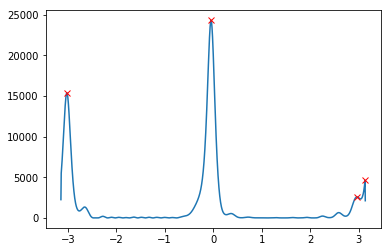

head: [925.38917203 251.57011506]
tail: [ 22.20704882 228.2617961 ]
orientation: -0.04398229715025747


In [7]:
#detect head and tail
mode ='curvature'
#mode = 'pca'
bd.detect_head_tail(mode)

print('head:', bd.get_head(mode))
print('tail:', bd.get_tail(mode))
print('center:', bd.get_center(mode))
print('orientation', bd.get_orientation(mode))

bd.view_head_tail_curvature()
 
curvature, angles, distances = bd.get_curvature_info()
peaks = bd.get_peaks()

plt.polar(angles, curvature)
plt.show()

plt.polar(angles, distances)
plt.show()

plt.plot(angles, curvature)
plt.plot(angles[peaks], curvature[peaks], 'x', color='r')
plt.show()

head_idx = peaks[0]
tail_idx = peaks[2]       

head_angle = angles[head_idx]
head_distance = distances[head_idx]
tail_angle = angles[tail_idx]
tail_distance = distances[tail_idx]

head = bd.transform_polar_to_cartesian(head_angle, head_distance, bd.get_center(mode))
tail = bd.transform_polar_to_cartesian(tail_angle, tail_distance, bd.get_center(mode))

orientation = bd.compute_angle(head, bd.get_center(mode))

print('head:',head)
print('tail:',tail)
print('orientation:', orientation)

head: [911.0, 238.0]
tail: [27.0, 224.0]
center: [457.50413899 230.85678228]
orientation -0.015874009047426838


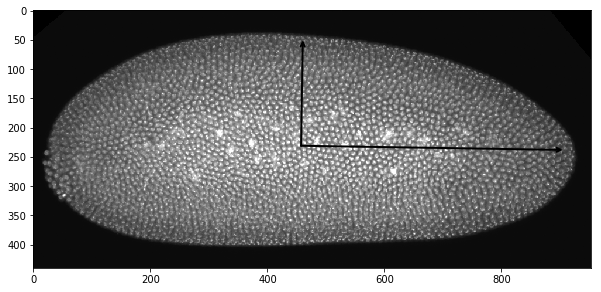

In [8]:
# test method Pricipal Component Analysis

mode = 'pca'
bd.detect_head_tail(mode)

print('head:', bd.get_head(mode))
print('tail:', bd.get_tail(mode))
print('center:', bd.get_center(mode))
print('orientation', bd.get_orientation(mode))

bd.view_head_tail_pca()



Test Roataion Class

manual rotation angle: 0.5235987755982988


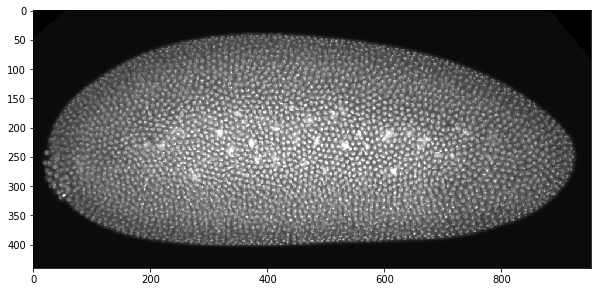

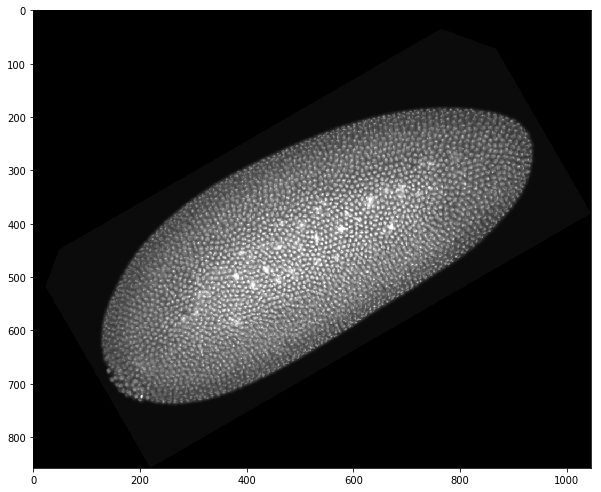

In [9]:
# init a rotation operation for egg1
r = Rotation(egg1)

angle = math.pi / 6
print('manual rotation angle:', angle)

r.set_angle(angle)

rotated_embryo = r.rotate_embryo(egg1, angle=angle)
egg1.view()
rotated_embryo.view()

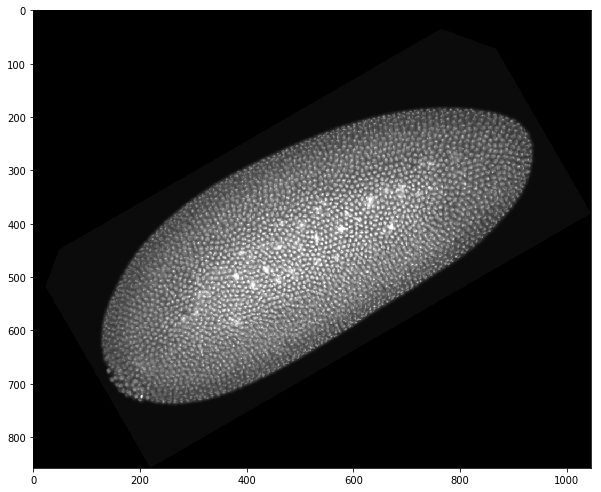

In [10]:
# test get_rotated_image
rotated_egg = Embryo(r.get_rotated_image())
rotated_egg.view()

rotation angle: 0.027227136331111602


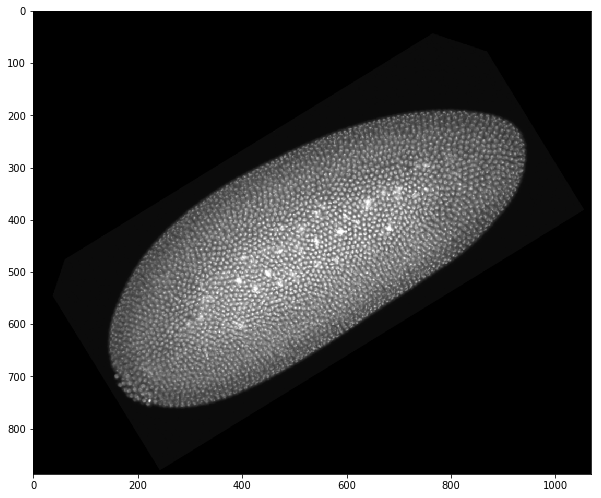

rotation angle: -0.5089380098815464


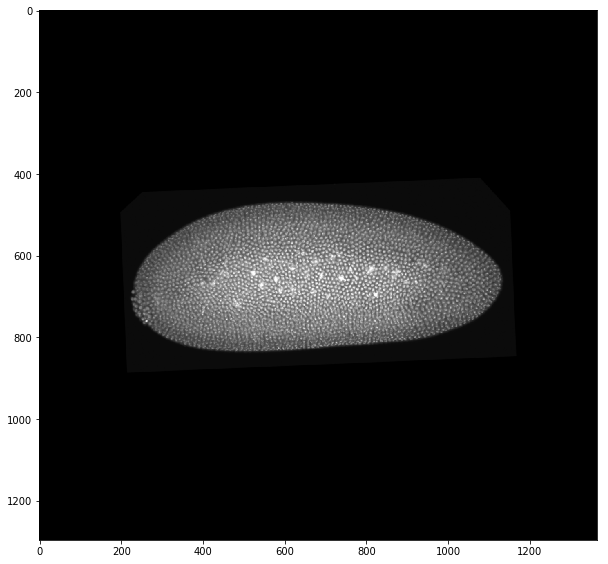

rotation angle: -0.027331548642023844


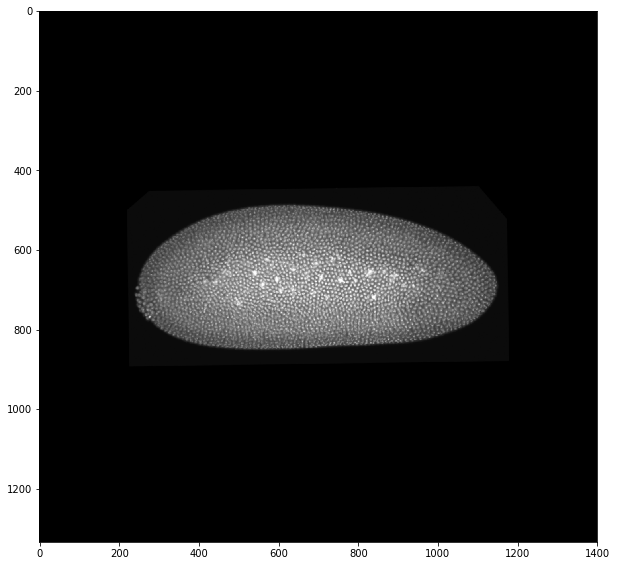

In [15]:
# rotate back

mode = 'curvature'
#mode = 'pca'
bd = Boundary(rotated_egg)
bd.detect_head_tail(mode)
print('rotation angle:', -bd.get_orientation(mode))

#with the presence of the boundary
rotated_egg2 = r.rotate_embryo(rotated_embryo, boundary=bd)
rotated_egg2.view()

# without boundary, using pca method to generate a boundary on the fly
rotated_egg3 = r.rotate_embryo(rotated_egg2, bd_mode = 'curvature')
print('rotation angle:', r.angle)
rotated_egg3.view()

#without boundary, use pca method on the fly
rotated_egg4 = r.rotate_embryo(rotated_egg3, bd_mode = 'pca')
print('rotation angle:', r.angle)
rotated_egg4.view()


Test Polygon Class

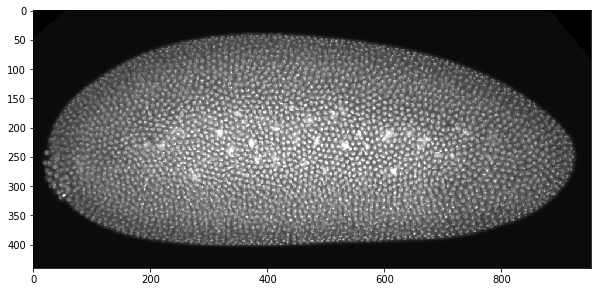

[440 954]


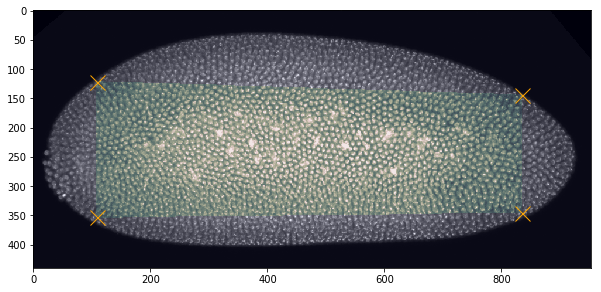

vertice: [ 121 , 108 ]
vertice: [ 353 , 108 ]
vertice: [ 345 , 835 ]
vertice: [ 144 , 835 ]


In [12]:
testing_img = Polygon(egg1)
testing_img.view()

print(testing_img.ref_image_dim)

# detect area from the image, using Fourier transformation and convex_hull curve
testing_img.detect_area()
testing_img.view_area()

for (x,y) in testing_img.vertices:
    print('vertice: [', x,',', y,']')


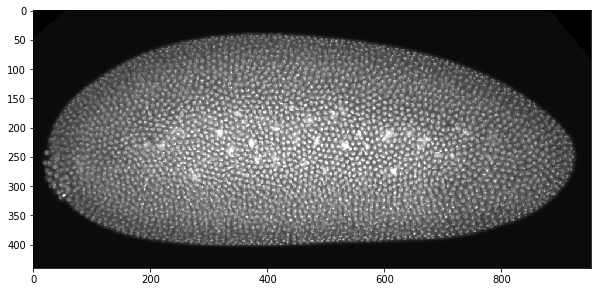

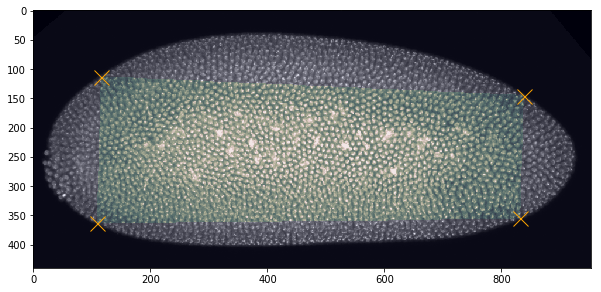

vertice: [ 113 , 116 ]
vertice: [ 363 , 109 ]
vertice: [ 355 , 832 ]
vertice: [ 145 , 838 ]


In [13]:
#detect area with the help of a boundary curve

testing_img = Polygon(egg1)
testing_img.view()

mode = 'curvature'
#mode = 'pca'
bd = Boundary(egg1)
bd.detect_head_tail(mode)

testing_img.detect_area(boundary = bd)
testing_img.view_area()

for (x,y) in testing_img.vertices:
    print('vertice: [', x,',', y,']')


Test Intensity Module

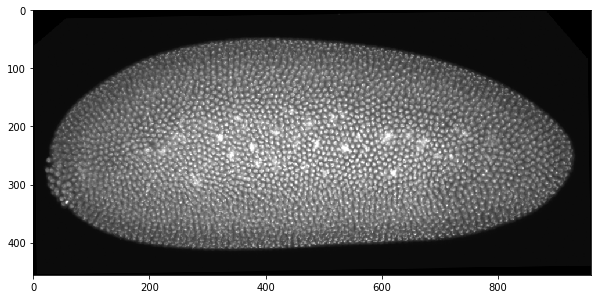

(906, 2)


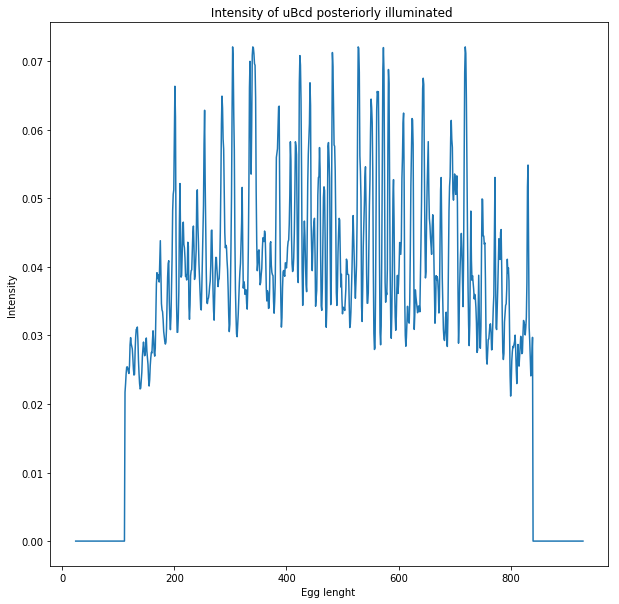

/Users/guanhuahe/anaconda/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


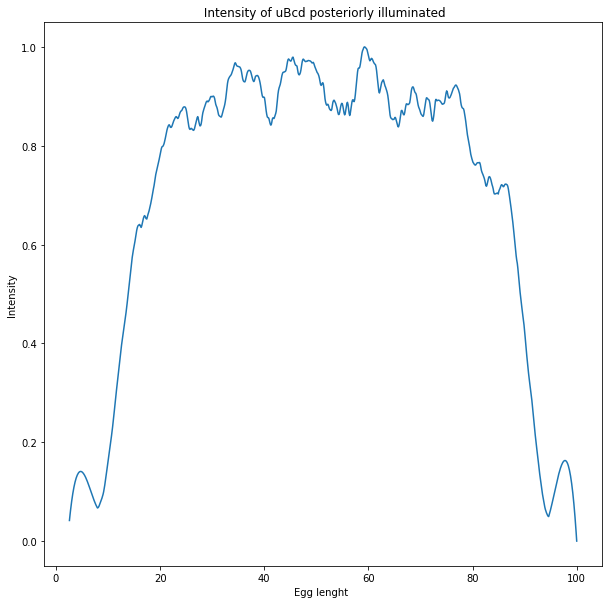

In [14]:
# rotate the embryo first to horizonal position
r = Rotation(egg1)
rotated_egg = r.rotate_embryo(egg1, bd_mode = 'pca')
rotated_egg.view()

# compute the intensity curve
intensity_curve = Intensity.detect_intensity(rotated_egg)
print(intensity_curve.shape)

# without normalization
Intensity.view([intensity_curve])

# after normalization
normalized_curves = Intensity.normalization([intensity_curve])
Intensity.view(normalized_curves)
